# **Sequential and Parallel Bubble Sort**

Sequential Bubble Sort: 0.0772s
Parallel Bubble Sort: 0.0644s


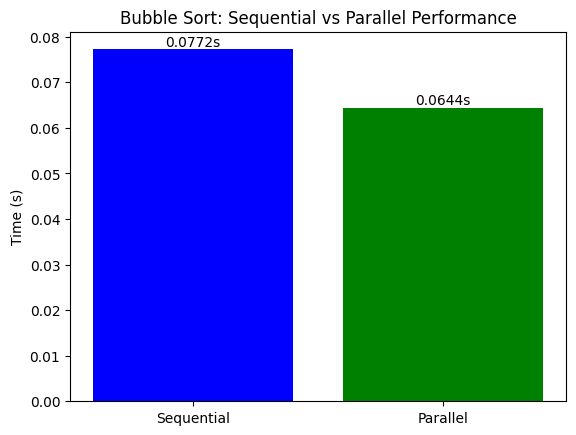

In [8]:
import multiprocessing
import random
import time
import matplotlib.pyplot as plt

# Sequential Bubble Sort
def sequential_bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

# Parallel Bubble Sort Helper
def bubble_sort_chunk(chunk):
    for i in range(len(chunk)):
        for j in range(0, len(chunk)-i-1):
            if chunk[j] > chunk[j+1]:
                chunk[j], chunk[j+1] = chunk[j+1], chunk[j]  # Corrected line
    return chunk

# Parallel Bubble Sort
def parallel_bubble_sort(arr):
    num_workers = multiprocessing.cpu_count()
    chunk_size = len(arr) // num_workers
    chunks = [arr[i * chunk_size: (i + 1) * chunk_size] for i in range(num_workers)]

    with multiprocessing.Pool(processes=num_workers) as pool:
        sorted_chunks = pool.map(bubble_sort_chunk, chunks)

    # Merging the sorted chunks
    result = []
    for chunk in sorted_chunks:
        result.extend(chunk)
    result.sort()  # Final sort for merging
    return result

# Generate dataset
arr = random.sample(range(1, 10000), 1000)

# Timing Sequential Bubble Sort
sequential_arr = arr.copy()
start = time.time()
sequential_bubble_sort(sequential_arr)
sequential_time = time.time() - start
print(f"Sequential Bubble Sort: {sequential_time:.4f}s")

# Timing Parallel Bubble Sort
parallel_arr = arr.copy()
start = time.time()
sorted_arr = parallel_bubble_sort(parallel_arr)
parallel_time = time.time() - start
print(f"Parallel Bubble Sort: {parallel_time:.4f}s")

# Visualization
labels = ['Sequential', 'Parallel']
times = [sequential_time, parallel_time]

plt.bar(labels, times, color=['blue', 'green'])
plt.ylabel('Time (s)')
plt.title('Bubble Sort: Sequential vs Parallel Performance')
for i, time_val in enumerate(times):
    plt.text(i, time_val, f'{time_val:.4f}s', ha='center', va='bottom', fontsize=10)
plt.show()


# ** Sequential and Parallel Heap Sort**

Sequential Heap Sort: 0.0004s
Parallel Heap Sort: 0.0252s


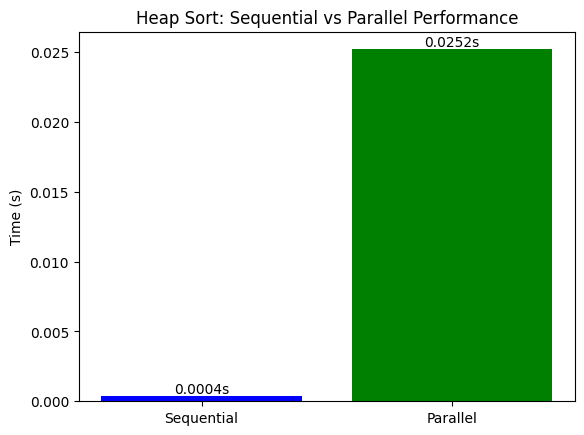

In [10]:
import heapq
import multiprocessing
import random
import time
import matplotlib.pyplot as plt

# Sequential Heap Sort
def sequential_heap_sort(arr):
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

# Parallel Heap Sort
def parallel_heap_sort(arr):
    num_workers = multiprocessing.cpu_count()
    chunk_size = len(arr) // num_workers
    chunks = [arr[i * chunk_size: (i + 1) * chunk_size] for i in range(num_workers)]

    with multiprocessing.Pool(processes=num_workers) as pool:
        sorted_chunks = pool.map(sequential_heap_sort, chunks)

    # Merging the sorted chunks
    result = []
    for chunk in sorted_chunks:
        result.extend(chunk)
    return sorted(result)

# Generate dataset
arr = random.sample(range(1, 10000), 1000)

# Timing Sequential Heap Sort
sequential_arr = arr.copy()
start = time.time()
sorted_arr = sequential_heap_sort(sequential_arr)
sequential_time = time.time() - start
print(f"Sequential Heap Sort: {sequential_time:.4f}s")

# Timing Parallel Heap Sort
parallel_arr = arr.copy()
start = time.time()
sorted_arr = parallel_heap_sort(parallel_arr)
parallel_time = time.time() - start
print(f"Parallel Heap Sort: {parallel_time:.4f}s")

# Visualization
labels = ['Sequential', 'Parallel']
times = [sequential_time, parallel_time]

plt.bar(labels, times, color=['blue', 'green'])
plt.ylabel('Time (s)')
plt.title('Heap Sort: Sequential vs Parallel Performance')
for i, time_val in enumerate(times):
    plt.text(i, time_val, f'{time_val:.4f}s', ha='center', va='bottom', fontsize=10)
plt.show()


# **Sequential and Parallel Merge Sort**

Sequential Merge Sort Time: 0.0059 seconds
Parallel Merge Sort Time: 0.0416 seconds


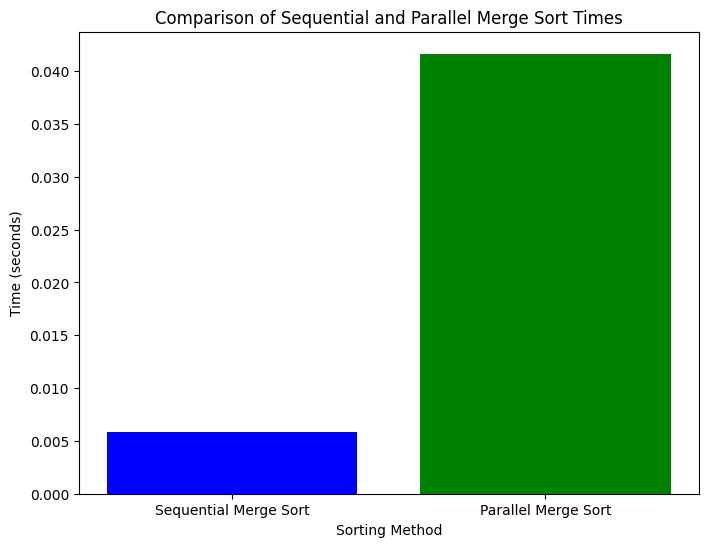

In [13]:
import multiprocessing
import random
import time
import matplotlib.pyplot as plt

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def parallel_merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2

    # Divide the array into two halves and sort them in parallel
    with multiprocessing.Pool(2) as pool:
        left, right = pool.map(sequential_merge_sort, [arr[:mid], arr[mid:]])

    # Merge the sorted halves
    return merge(left, right)

def sequential_merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = sequential_merge_sort(arr[:mid])
    right = sequential_merge_sort(arr[mid:])
    return merge(left, right)

if __name__ == "__main__":
    # Generate dataset
    arr = random.sample(range(1, 10000), 1000)

    # Timing Sequential Merge Sort
    start = time.time()
    sorted_sequential = sequential_merge_sort(arr.copy())
    sequential_time = time.time() - start
    print(f"Sequential Merge Sort Time: {sequential_time:.4f} seconds")

    # Timing Parallel Merge Sort
    start = time.time()
    sorted_parallel = parallel_merge_sort(arr.copy())
    parallel_time = time.time() - start
    print(f"Parallel Merge Sort Time: {parallel_time:.4f} seconds")

    # Visualization of the sorting times
    labels = ['Sequential Merge Sort', 'Parallel Merge Sort']
    times = [sequential_time, parallel_time]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, times, color=['blue', 'green'])
    plt.title('Comparison of Sequential and Parallel Merge Sort Times')
    plt.xlabel('Sorting Method')
    plt.ylabel('Time (seconds)')
    plt.show()


# **Sequential and Parallel Selection Sort**

Sequential Selection Sort Time: 0.0385 seconds
Parallel Selection Sort Time: 0.0459 seconds


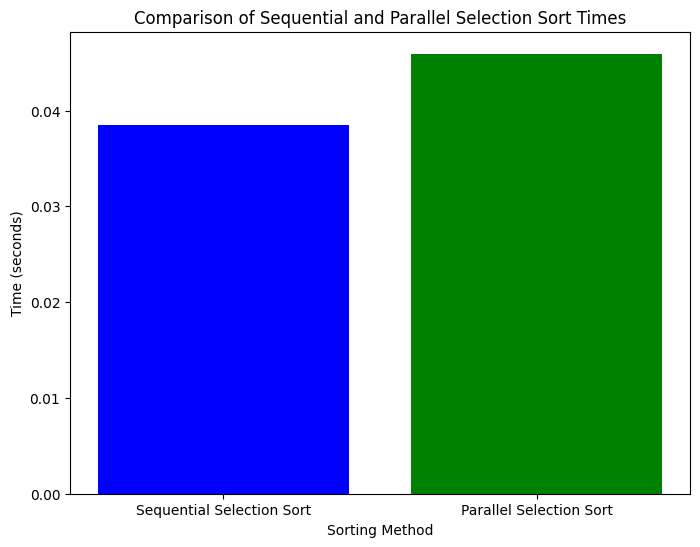

In [14]:
import multiprocessing
import random
import time
import matplotlib.pyplot as plt

# Sequential Selection Sort
def sequential_selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

# Parallel Selection Sort Helper
def selection_sort_chunk(chunk):
    n = len(chunk)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if chunk[j] < chunk[min_idx]:
                min_idx = j
        chunk[i], chunk[min_idx] = chunk[min_idx], chunk[i]
    return chunk

# Parallel Selection Sort
def parallel_selection_sort(arr):
    num_workers = multiprocessing.cpu_count()
    chunk_size = len(arr) // num_workers
    chunks = [arr[i * chunk_size: (i + 1) * chunk_size] for i in range(num_workers)]

    with multiprocessing.Pool(processes=num_workers) as pool:
        sorted_chunks = pool.map(selection_sort_chunk, chunks)

    # Merging sorted chunks
    merged = []
    for chunk in sorted_chunks:
        merged.extend(chunk)
    return sorted(merged)

# Generate dataset
arr = random.sample(range(1, 10000), 1000)

# Timing Sequential Selection Sort
sequential_arr = arr.copy()
start = time.time()
sequential_selection_sort(sequential_arr)
sequential_time = time.time() - start
print(f"Sequential Selection Sort Time: {sequential_time:.4f} seconds")

# Timing Parallel Selection Sort
parallel_arr = arr.copy()
start = time.time()
sorted_parallel = parallel_selection_sort(parallel_arr)
parallel_time = time.time() - start
print(f"Parallel Selection Sort Time: {parallel_time:.4f} seconds")

# Visualization of the sorting times
labels = ['Sequential Selection Sort', 'Parallel Selection Sort']
times = [sequential_time, parallel_time]

plt.figure(figsize=(8, 6))
plt.bar(labels, times, color=['blue', 'green'])
plt.title('Comparison of Sequential and Parallel Selection Sort Times')
plt.xlabel('Sorting Method')
plt.ylabel('Time (seconds)')
plt.show()


# ** Performance Comparison**

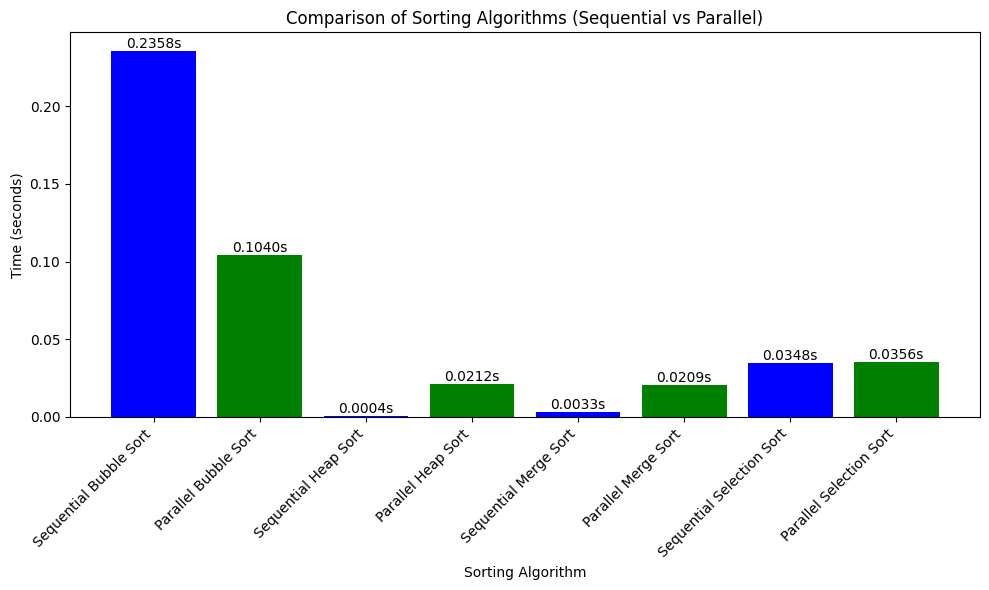

In [20]:
import multiprocessing
import random
import time
import matplotlib.pyplot as plt
import heapq

# Sequential and Parallel Sorting Functions

def sequential_bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def bubble_sort_chunk(chunk):
    for i in range(len(chunk)):
        for j in range(0, len(chunk)-i-1):
            if chunk[j] > chunk[j+1]:
                chunk[j], chunk[j+1] = chunk[j+1], chunk[j]
    return chunk

def parallel_bubble_sort(arr):
    num_workers = multiprocessing.cpu_count()
    chunk_size = len(arr) // num_workers
    chunks = [arr[i * chunk_size: (i + 1) * chunk_size] for i in range(num_workers)]
    with multiprocessing.Pool(processes=num_workers) as pool:
        sorted_chunks = pool.map(bubble_sort_chunk, chunks)
    result = []
    for chunk in sorted_chunks:
        result.extend(chunk)
    result.sort()
    return result

def sequential_heap_sort(arr):
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

def parallel_heap_sort(arr):
    num_workers = multiprocessing.cpu_count()
    chunk_size = len(arr) // num_workers
    chunks = [arr[i * chunk_size: (i + 1) * chunk_size] for i in range(num_workers)]
    with multiprocessing.Pool(processes=num_workers) as pool:
        sorted_chunks = pool.map(sequential_heap_sort, chunks)
    result = []
    for chunk in sorted_chunks:
        result.extend(chunk)
    return sorted(result)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def sequential_merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = sequential_merge_sort(arr[:mid])
    right = sequential_merge_sort(arr[mid:])
    return merge(left, right)

def parallel_merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    with multiprocessing.Pool(2) as pool:
        left, right = pool.map(sequential_merge_sort, [arr[:mid], arr[mid:]])
    return merge(left, right)

def sequential_selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def selection_sort_chunk(chunk):
    n = len(chunk)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if chunk[j] < chunk[min_idx]:
                min_idx = j
        chunk[i], chunk[min_idx] = chunk[min_idx], chunk[i]
    return chunk

def parallel_selection_sort(arr):
    num_workers = multiprocessing.cpu_count()
    chunk_size = len(arr) // num_workers
    chunks = [arr[i * chunk_size: (i + 1) * chunk_size] for i in range(num_workers)]
    with multiprocessing.Pool(processes=num_workers) as pool:
        sorted_chunks = pool.map(selection_sort_chunk, chunks)
    merged = []
    for chunk in sorted_chunks:
        merged.extend(chunk)
    return sorted(merged)

# Timing Functions
def time_sorting_algorithm(algorithm, arr):
    start = time.time()
    algorithm(arr)
    return time.time() - start

# Generate dataset
arr = random.sample(range(1, 10000), 1000)

# Measure times
sequential_bubble_time = time_sorting_algorithm(sequential_bubble_sort, arr.copy())
parallel_bubble_time = time_sorting_algorithm(parallel_bubble_sort, arr.copy())

sequential_heap_time = time_sorting_algorithm(sequential_heap_sort, arr.copy())
parallel_heap_time = time_sorting_algorithm(parallel_heap_sort, arr.copy())

sequential_merge_time = time_sorting_algorithm(sequential_merge_sort, arr.copy())
parallel_merge_time = time_sorting_algorithm(parallel_merge_sort, arr.copy())

sequential_selection_time = time_sorting_algorithm(sequential_selection_sort, arr.copy())
parallel_selection_time = time_sorting_algorithm(parallel_selection_sort, arr.copy())

# Visualization
labels = [
    'Sequential Bubble Sort', 'Parallel Bubble Sort',
    'Sequential Heap Sort', 'Parallel Heap Sort',
    'Sequential Merge Sort', 'Parallel Merge Sort',
    'Sequential Selection Sort', 'Parallel Selection Sort'
]
times = [
    sequential_bubble_time, parallel_bubble_time,
    sequential_heap_time, parallel_heap_time,
    sequential_merge_time, parallel_merge_time,
    sequential_selection_time, parallel_selection_time
]

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'blue', 'green', 'blue', 'green', 'blue', 'green'])
plt.title('Comparison of Sorting Algorithms (Sequential vs Parallel)')
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
for i, time_val in enumerate(times):
    plt.text(i, time_val, f'{time_val:.4f}s', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

